In [1]:
#Loading the Libraries
import cv2
from IPython.display import Video
import os, re
import numpy as np
import logging
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def areas(Annotation_folder):
    area_list = []
    for annotation_folders in os.listdir(Annotation_folder):
        for annotation_files in os.listdir(os.path.join(Annotation_folder, annotation_folders)):
            annotation = os.path.join(Annotation_folder, annotation_folders, annotation_files)
            if os.stat(annotation).st_size == 0:
                continue
            elif os.path.splitext(annotation)[1].lower() in ['.txt']:
                f = open(annotation, 'r')
                for lines in f:
                    words = lines.split()
                    bbox_area = int(words[6])
                    area_list.append(bbox_area)
                f.close()
    return area_list
    

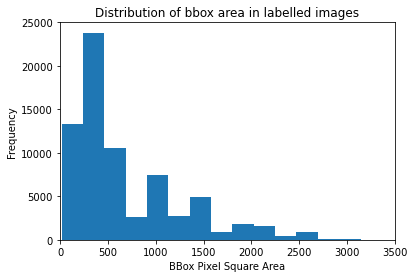

In [31]:
#Plotting histogram (regarding bbox area) for Data Source 1
Annotation_folder = "./Video_Dataset/Data_Source1/annotation/Annotation_folder"
x = areas(Annotation_folder)
plt.hist(x, bins = 20)
plt.xlim(0, 3500)
plt.ylim(0,25000)
plt.xlabel("BBox Pixel Square Area")
plt.ylabel("Frequency")
plt.title("Distribution of bbox area in labelled images")
plt.show()

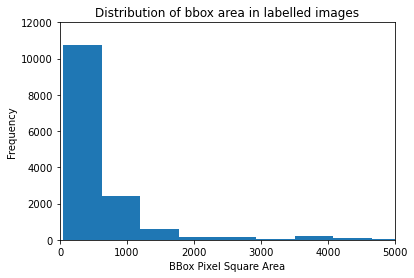

In [32]:
#Plotting histogram (regarding bbox area) for Data Source 2
Annotation_folder = "./Video_Dataset/Data_Source2/Annotations/Annotation_folder"
x = areas(Annotation_folder)
plt.hist(x, bins = 100)
plt.xlim(0, 5000)
plt.ylim(0,12000)
plt.xlabel("BBox Pixel Square Area")
plt.ylabel("Frequency")
plt.title('Distribution of bbox area in labelled images')
plt.show()

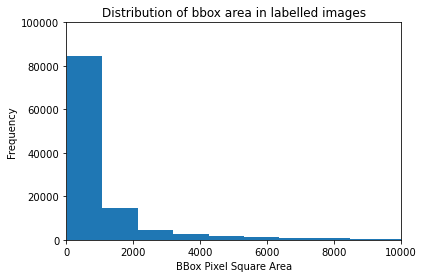

In [35]:
#Plotting histogram (regarding bbox area) for Data Source 4
Annotation_folder = "./Video_Dataset/Data_Source4/annotations/Annotation_folder"
x = areas(Annotation_folder)
plt.hist(x, bins = 200)
plt.xlim(0, 10000)
plt.ylim(0,100000)
plt.xlabel("BBox Pixel Square Area")
plt.ylabel("Frequency")
plt.title("Distribution of bbox area in labelled images")
plt.show()


### mAP Score vs Distance camera is away from drone

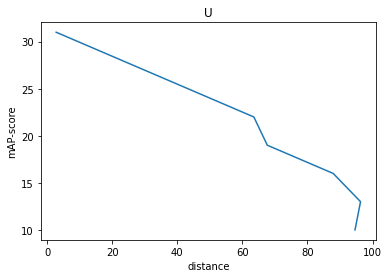

In [4]:
mAPscore = [94.61, 96.31, 87.91, 67.65, 63.51, 02.75]
distance = [10, 13, 16, 19, 22, 31]
plt.plot(mAPscore, distance)
plt.title('U')
plt.xlabel('distance')
plt.ylabel('mAP-score')
plt.show()

In [8]:
!python plotCurve.py ./720_095.csv ./720_050.csv "./1080_095.csv" "./720_095.csv" "./1080_095.csv" "./1080_050.csv"

Figure(640x480)
Figure(640x480)
Figure(640x480)


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#create DataFrame
#1080_95
df = pd.DataFrame({'x': [10, 13, 23, 28 33, 43],
                   'y': [97.54, 95.91, 66.76, 7.49]})
#df = pd.DataFrame({'x': [10, 13, 18, 23, 28, 33, 38, 43],
                   #'y': [100, 97.54, 100, 95.91, 68.85, 66.76, 80.21, 7.49]})
#1080_50
df1 = pd.DataFrame({'x': [10, 13, 23, 33, 43],
                   'y': [97.54, 96.87, 81.20, 15.04]})
#df1 = pd.DataFrame({'x': [10, 13, 18, 23, 28, 33, 38, 43],
                   #'y': [100, 97.54, 100, 96.87, 69.98, 81.20, 82.79, 7.49]})

model_95 = np.poly1d(np.polyfit(df.x, df.y, 2))
model_50 = np.poly1d(np.polyfit(df1.x, df1.y, 2))

#create scatterplot (1080_95)
#polyline = np.linspace(10, 45, 15)
plt.scatter(df.x, df.y, c='red')
#create scatterplot (1080_50)
#polyline = np.linspace(10, 45, 50)
plt.scatter(df1.x, df1.y, c='blue')

#plt.plot(polyline, model_95(polyline), color='red', label='1080p(0.95)')
#plt.plot(polyline, model_50(polyline), color='blue', label='1080p(0.5)')
plt.title("0.95(1080p) vs 0.50(1080p)")
plt.xlabel("Distance/m")
plt.ylabel("mAP/%")
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-44-3a27b106233e>, line 25)

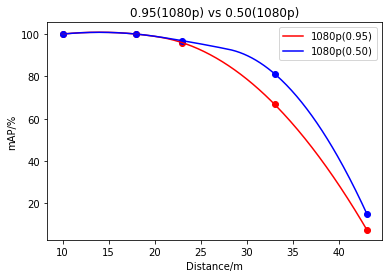

In [42]:
from scipy.interpolate import make_interp_spline, BSpline

#1080 95
x = np.array([10, 18, 23, 33, 43])
y = np.array([100, 100, 95.91, 66.76, 7.49])

#1080 50
x1 = np.array([10, 18, 23, 33, 43])
y1 = np.array([100, 100, 96.87, 81.20, 15.03])

# 300 represents number of points to make between T.min and T.max 1080
xnew = np.linspace(x.min(), x.max(), 300)
sp = make_interp_spline(x, y, k=2)  # type: BSpline
power_smooth = sp(xnew)

# 300 represents number of points to make between T.min and T.max 1080
xnew1 = np.linspace(x1.min(), x1.max(), 300)
sp1 = make_interp_spline(x1, y1, k=2)  # type: BSpline
power_smooth1 = sp1(xnew1)

#1080 95
plt.scatter(x, y, c='red')
#1080 50
plt.scatter(x1, y1, c='blue')
#1080 95
plt.plot(xnew, power_smooth, color = 'red', label='1080p(0.95)')
#1080 50
plt.plot(xnew1, power_smooth1, color = 'blue', label='1080p(0.50)')
plt.title("0.95(1080p) vs 0.50(1080p)")
plt.xlabel("Distance/m")
plt.ylabel("mAP/%")
plt.legend()
plt.show()

### Find bounding box size for the different data

In [2]:
def cal_height_width(label_folder):
    count = 0
    heights = []
    widths = []
    areas = []
    for files in os.listdir(label_folder):
        if files.endswith('.txt'):
            label_file = os.path.join(label_folder, files)
            with open(label_file, 'r') as f:
                for lines in f:
                    count += 1
                    annotations = lines.split()
                    x1, y1, x2, y2 = [float(annotations[4]), float(annotations[5]), float(annotations[6]), float(annotations[7])]
                    height = y2-y1
                    width = x2-x1
                    area = height * width
                    heights.append(height)
                    widths.append(width)
                    areas.append(area)
    print('average height: ', np.mean(heights))
    print('average width: ', np.mean(widths))
    print('average area: ', np.mean(areas))
    print('highest height pixel of anchor shape is', max(heights))
    print('highest width pixel of anchor shape is', max(widths))
    print('highest area pixel of anchor shape is', max(areas))
    print('Lowest height pixel of anchor shape is', min(heights))
    print('lowest width pixel of anchor shape is', min(widths))
    print('lowest area pixel of anchor shape is', min(areas))
    print('Total Number of annotations are', count)
    return heights, widths, areas

In [3]:
#internet data
internet_label = './drone_data_unsplit_resize/drone_data_unsplit_resize/labels/'
heights, widths, areas = cal_height_width(internet_label)

average height:  117.31044906900328
average width:  169.43467688937568
average area:  24023.785238882807
highest height pixel of anchor shape is 349.0
highest width pixel of anchor shape is 623.0
highest area pixel of anchor shape is 213689.0
Lowest height pixel of anchor shape is 42.17000000000007
lowest width pixel of anchor shape is 72.97000000000003
lowest area pixel of anchor shape is 3420.0
Total Number of annotations are 6391


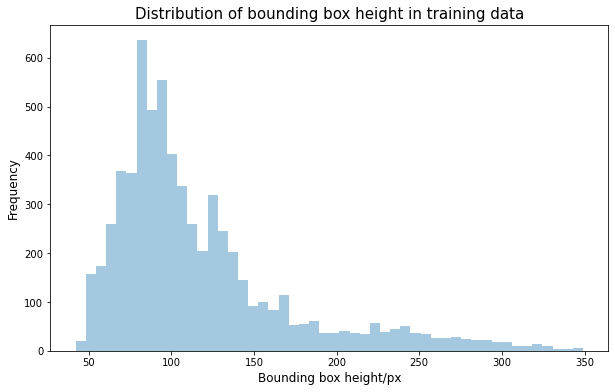

In [22]:
import seaborn as sns
plt.figure(figsize=(10,6))
ah = sns.distplot(heights, kde= False, norm_hist = False)
plt.title("Distribution of bounding box height in training data", fontsize = 15)

plt.xlabel("Bounding box height/px", fontsize = 12)

plt.ylabel("Frequency", fontsize =12)
fig = ah.get_figure()
fig.savefig("training_height.png") 
#ax.set_xlabel("Bounding box height", fontsize = 20)
#ax.set_ylabel("Frequency", fontsize = 20)

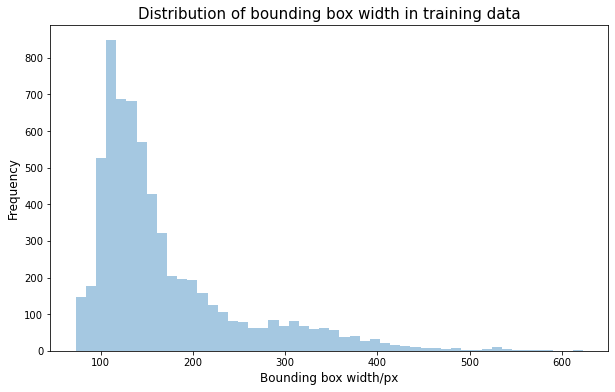

In [25]:
plt.figure(figsize=(10,6))
aw = sns.distplot(widths, kde= False, norm_hist = False)
plt.title("Distribution of bounding box width in training data", fontsize = 15)
plt.xlabel("Bounding box width/px", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
fig = aw.get_figure()
fig.savefig("training_width.png") 

Text(0, 0.5, 'Frequency')

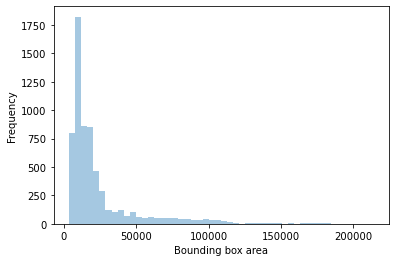

In [28]:
aa = sns.distplot(areas, kde= False, norm_hist = False)
plt.xlabel("Bounding box area")
plt.ylabel("Frequency")

In [11]:
#Synthetic data
synthetic_label = './synData_unsplit/synData_unsplit/labels/'
heights1, widths1, areas1 = cal_height_width(synthetic_label)

average height:  32.77994753716118
average width:  58.51501020110755
average area:  2495.1059457884
highest height pixel of anchor shape is 773.0
highest width pixel of anchor shape is 642.0
highest area pixel of anchor shape is 496266.0
Lowest height pixel of anchor shape is 18.0
lowest width pixel of anchor shape is 31.0
lowest area pixel of anchor shape is 558.0
Total Number of annotations are 6862


Text(0, 0.5, 'Frequency')

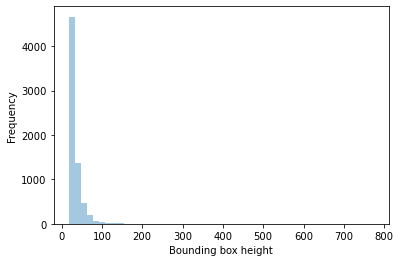

In [12]:
ah = sns.distplot(heights1, kde= False, norm_hist = False)
plt.xlabel("Bounding box height")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

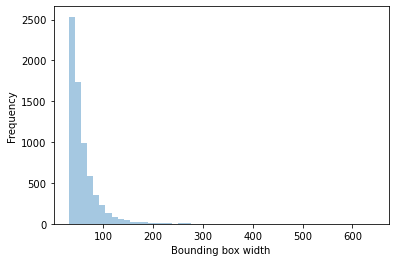

In [13]:
aw = sns.distplot(widths1, kde= False, norm_hist = False)
plt.xlabel("Bounding box width")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

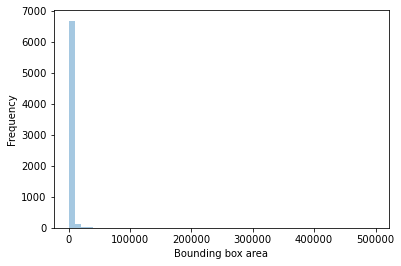

In [29]:
aa = sns.distplot(areas1, kde= False, norm_hist = False)
plt.xlabel("Bounding box area")
plt.ylabel("Frequency")

In [27]:
#Test Data
test_label = './Video_Dataset/Test_Data/labelled_test_data/labelled_test_data/labels/'
heights2, widths2, areas2 = cal_height_width(test_label)

average height:  25.421631087391592
average width:  41.37403602401601
average area:  1073.893057560596
highest height pixel of anchor shape is 73.0
highest width pixel of anchor shape is 106.54999999999995
highest area pixel of anchor shape is 7227.0
Lowest height pixel of anchor shape is 15.0
lowest width pixel of anchor shape is 21.0
lowest area pixel of anchor shape is 378.0
Total Number of annotations are 8994


In [ ]:
plt.title("Distribution of bounding box width in training data", fontsize = 15)
plt.xlabel("Bounding box width/px", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
fig = aw.get_figure()
fig.savefig("training_width.png")

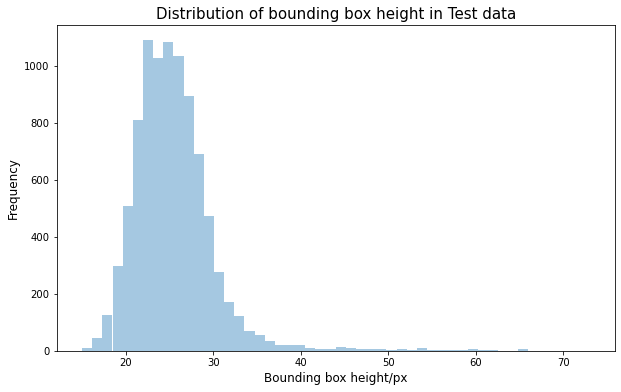

In [28]:
plt.figure(figsize=(10,6))
ah = sns.distplot(heights2, kde= False, norm_hist = False)
plt.title("Distribution of bounding box height in Test data", fontsize = 15)
plt.xlabel("Bounding box height/px", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
fig = ah.get_figure()
fig.savefig("test_height.png")

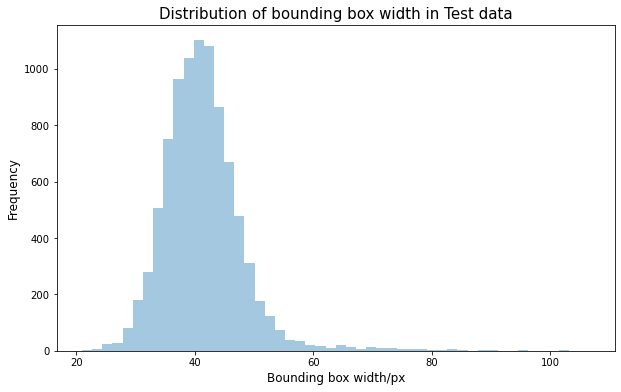

In [29]:
plt.figure(figsize=(10,6))
aw = sns.distplot(widths2, kde= False, norm_hist = False)
plt.title("Distribution of bounding box width in Test data", fontsize = 15)
plt.xlabel("Bounding box width/px", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
fig = aw.get_figure()
fig.savefig("test_width.png")

Text(0, 0.5, 'Frequency')

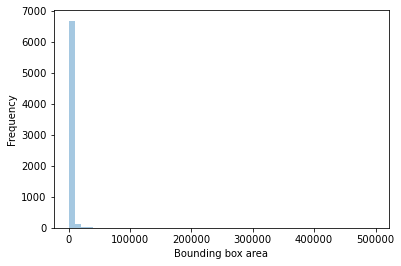

In [30]:
aa = sns.distplot(areas2, kde= False, norm_hist = False)
plt.xlabel("Bounding box area")
plt.ylabel("Frequency")